# 1. Imports

In [1]:
import random

seed = 845
random.seed(seed)
np.random.seed(seed)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample/SampleSubmission.csv
/kaggle/input/co2-prediction-dataset/Train.csv
/kaggle/input/co2-prediction-dataset/Test.csv


In [3]:
import missingno as msno
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from copy import deepcopy
from functools import partial
from itertools import combinations

from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import folium
from haversine import haversine
import random
from random import uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
import statsmodels.api as sm
import math
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoost, CatBoostRegressor,CatBoostClassifier
from catboost import Pool
from sklearn.neighbors import KNeighborsRegressor
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


In [4]:
train = pd.read_csv('/kaggle/input/co2-prediction-dataset/Train.csv')
test = pd.read_csv('/kaggle/input/co2-prediction-dataset/Test.csv')

train=train.drop(columns=["ID_LAT_LON_YEAR_WEEK"])
test=test.drop(columns=["ID_LAT_LON_YEAR_WEEK"])

train_copy=train.copy()
test_copy=test.copy()

train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,56.896198,-89.545030,17.991569,0.000033,0.023408,2829.881106,2583.717282,835381.851887,24.227459,56.937397,-89.606501,18.019698,0.000057,0.000016,0.000041,0.000127,9904.580385,-1.668380,0.080565,835960.031250,-13.285625,45.229958,-92.185623,22.836521,0.000327,0.955292,0.000221,0.223929,17.991569,-89.545030,56.896198,24.939440,-0.827406,836132.990994,-37.714318,48.482034,-92.858289,25.377301,0.121379,2.771816,0.340750,226.969563,0.544172,-37.714318,48.482034,-92.858289,25.377301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392759,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,31.137265,-88.956530,20.223611,-0.000067,0.024189,2136.614929,1864.319244,836015.109375,-14.290228,27.514546,-90.409693,23.053571,0.000069,0.000029,0.000040,0.000131,8935.897092,-1.347168,0.063770,835799.541667,16.624162,31.137265,-88.956530,20.223611,0.000217,1.208491,0.000189,0.156222,19.496789,-88.674842,33.211209,31.438973,-0.986435,836090.625000,-25.925806,39.234204,-90.410349,23.857288,0.118592,2.485873,0.299359,228.693974,0.384905,-25.925806,39.234204,-90.410349,23.857288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418427,61615.924069,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,44.441063,-86.535887

# 2. Data Description

In [ ]:
train.describe(include="all")

In [5]:
table = PrettyTable()

table.field_names = ['Column Name', 'Data Type', 'Train Missing %', 'Test Missing %']
for column in train.columns:
    data_type = str(train[column].dtype)
    non_null_count_train= np.round(100-train[column].count()/train.shape[0]*100,1)
    if column!='emission':
        non_null_count_test = np.round(100-test[column].count()/test.shape[0]*100,1)
    else:
        non_null_count_test="NA"
    table.add_row([column, data_type, non_null_count_train,non_null_count_test])
print(table)

+----------------------------------------------------------+-----------+-----------------+----------------+
|                       Column Name                        | Data Type | Train Missing % | Test Missing % |
+----------------------------------------------------------+-----------+-----------------+----------------+
|                         latitude                         |  float64  |       0.0       |      0.0       |
|                        longitude                         |  float64  |       0.0       |      0.0       |
|                           year                           |   int64   |       0.0       |      0.0       |
|                         week_no                          |   int64   |       0.0       |      0.0       |
|         SulphurDioxide_SO2_column_number_density         |  float64  |       2.6       |      3.3       |
|       SulphurDioxide_SO2_column_number_density_amf       |  float64  |       2.6       |      3.3       |
|      SulphurDioxide_SO2_sl

# 3. Data Visualization

In [ ]:
emission = train['emission']

mean_emission = np.mean(emission)
median_emission = np.median(emission)

fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(emission, bins=20, density=True, alpha=0.5, label='Emission Histogram')

x_values = np.linspace(emission.min(), emission.max(), len(emission))
density_values = (1 / (np.sqrt(2 * np.pi) * np.std(emission))) * np.exp(-0.5 * ((x_values - mean_emission) / np.std(emission))**2)
ax.plot(x_values, density_values, color='red', label='Emission Density')

ax.axvline(mean_emission, color='blue', linestyle='dashed', linewidth=2, label='Mean Emission')
ax.axvline(median_emission, color='green', linestyle='dashed', linewidth=2, label='Median Emission')

ax.set_xlabel('Emission')
ax.set_ylabel('Frequency / Density')
ax.set_title('Emission Distribution and Density Plot')

x_min = emission.min()
x_max = emission.max()
ax.set_xlim([x_min, x_max])

ax.legend(bbox_to_anchor=(1, 1), fancybox=False, shadow=False, loc='upper left')

plt.tight_layout()
plt.show()

A log transformation is needed to normalize the distribution

In [ ]:
emission = np.log1p(train['emission'])

mean_emission = np.mean(emission)
median_emission = np.median(emission)

fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(emission, bins=20, density=True, alpha=0.5, label='Emission Histogram')

x_values = np.linspace(emission.min(), emission.max(), len(emission))
density_values = (1 / (np.sqrt(2 * np.pi) * np.std(emission))) * np.exp(-0.5 * ((x_values - mean_emission) / np.std(emission))**2)
ax.plot(x_values, density_values, color='red', label='Emission Density')

ax.axvline(mean_emission, color='blue', linestyle='dashed', linewidth=2, label='Mean Emission')
ax.axvline(median_emission, color='green', linestyle='dashed', linewidth=2, label='Median Emission')

ax.set_xlabel('Emission')
ax.set_ylabel('Frequency / Density')
ax.set_title('Emission Distribution and Density Plot')

x_min = emission.min()
x_max = emission.max()
ax.set_xlim([x_min, x_max])

ax.legend(bbox_to_anchor=(1, 1), fancybox=False, shadow=False, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
cont_cols=[f for f in train.columns if train[f].dtype in [float,int] and train[f].nunique()>2 and f not in ['emission']]

# Calculate the number of rows needed for the subplots
num_rows = (len(cont_cols) + 2) // 3

# Create subplots for each continuous column
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    # Determine the range of values to plot
    max_val = max(train[col].max(), test[col].max())
    min_val = min(train[col].min(), test[col].min())
    range_val = max_val - min_val
    
    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)
    
    # Calculate the subplot position
    row = i // 3
    col_pos = i % 3
    
    # Plot the histograms
    sns.histplot(train[col], ax=axs[row][col_pos], color='green', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(test[col], ax=axs[row][col_pos], color='blue', kde=True, label='Test', bins=num_bins_test)
    axs[row][col_pos].set_title(col)
    axs[row][col_pos].set_xlabel('Value')
    axs[row][col_pos].set_ylabel('Frequency')
    axs[row][col_pos].legend()

# Remove any empty subplots
if len(cont_cols) % 3 != 0:
    for col_pos in range(len(cont_cols) % 3, 3):
        axs[-1][col_pos].remove()

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))
data=train.copy()
data['emission']=np.log1p(data['emission'])
sns.boxplot(x='year', y='emission', data=data, ax=ax)
ax.set_title(f'Boxplot of emissions Across year')
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(x='week_no', data=train)
plt.title('Weekly emission count')
plt.show()

In [ ]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -33.93) & (train.longitude == 25.67)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -33.93 lon 25.67', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['blue','orange', 'green' , 'red']):
    df = sample_loc[sample_loc.year == year]
    sns.lineplot(x=df.week_no,y= df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

In [ ]:
sns.lineplot(data = train, x = 'year', y = 'emission', errorbar = None)
plt.title('Emission Trend Over Year')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
fil_data_2019 = train[train['year'] == 2019]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2019, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2019')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

In [ ]:
fil_data_2020 = train[train['year'] == 2020]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2020, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2020')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

In [ ]:
fil_data_2021 = train[train['year'] == 2021]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2021, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2021')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

In [ ]:
fil_data_2022 = train[train['year'] == 2022]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2022, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2022')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

# 4. Geo Visualization

In [ ]:
import geopandas as gpd

# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas df
geo_df.head()

In [ ]:
from shapely.geometry import Point
import folium

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo_df.set_type[i] == "train":
        type_color = "green"
    elif geo_df.set_type[i] == "test":
        type_color = "orange"

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            popup= 
            "Set: " + str(geo_df.set_type[i]) + "<br>"
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color =  type_color),
        )
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

# 5. Feature Engineering

In [6]:
# drop columns with missing %>90
high_missing_cols=[f for f in train.columns if train[f].isna().sum()/train[f].nunique()>0.9 and f not in ['emission']]

# train=train.drop(columns=high_missing_cols)
# test=test.drop(columns=high_missing_cols)
cont_missing=[f for f in train.columns if train[f].dtype!='O' and f not in ['emission']]

Fill and predict missing values

In [7]:
cb_params = {
            'iterations': 200,
            'depth': 6,
            'learning_rate': 0.008,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': seed,
            'task_type': 'GPU'
        }
lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'force_col_wise': True,
            'device': 'gpu',
            'random_state': seed
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(y1,y2)))

def store_missing_rows(df, features):
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows


def fill_missing_numerical(train,test,target, features, max_iterations=10):
    
    df=pd.concat([train.drop(columns=[target]),test],axis="rows")
    df=df.reset_index(drop=True)
    
    features=[f for f in features if df[f].isna().sum()>0]
    # Step 1: Store the instances with missing values in each feature
    missing_rows = store_missing_rows(df, features)
    
    # Step 2: Initially fill all missing values with "Median"
    for f in features:
        df[f]=df[f].fillna(df[f].median())
    
    cat_features=[f for f in df.columns if df[f].dtype=="O"]
    dictionary = {feature: [] for feature in features}
    
    for iteration in tqdm(range(max_iterations), desc="Iterations"):
        for feature in features:
            # Skip features with no missing values
            rows_miss = missing_rows[feature].index
            
            missing_temp = df.loc[rows_miss].copy()
            non_missing_temp = df.drop(index=rows_miss).copy()
            y_pred_prev=missing_temp[feature]
            missing_temp = missing_temp.drop(columns=[feature])
            
            
            # Step 3: Use the remaining features to predict missing values using Random Forests
            X_train = non_missing_temp.drop(columns=[feature])
            y_train = non_missing_temp[[feature]]
#             if iteration/max_iterations<0.5:
#                 model = LinearRegression()
#                 model.fit(X_train, y_train)
#             else:
# #                 model = CatBoostRegressor(**cb_params)
            model= lgb.LGBMRegressor(**lgb_params)
# #                 model.fit(X_train, y_train,cat_features=cat_features)
            model.fit(X_train, y_train)


            
            
            # Step 4: Predict missing values for the feature and update all N features
            y_pred = model.predict(missing_temp)
            df.loc[rows_miss, feature] = y_pred
            error_minimize=rmse(y_pred,y_pred_prev)
            dictionary[feature].append(error_minimize)  # Append the error_minimize value

    for feature, values in dictionary.items():
            values=np.array(values)/sum(values)
            iterations = range(1, len(values) + 1)  # x-axis values (iterations)
            plt.plot(iterations, values, label=feature)  # plot the values
            plt.xlabel('Iterations')
            plt.ylabel('RMSE')
            plt.title('Minimization of RMSE with iterations')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         if len(dictionary) % 3 == 0 or feature == list(dictionary.keys())[-1]:
    plt.show()
    train[features] = np.array(df.iloc[:train.shape[0]][features])
    test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

# train,test = fill_missing_numerical(train,test,"emission",cont_missing,8)

Preprocessing and Training to reduce RMSE score

In [8]:
data=train.copy()
data['emission']=np.log1p(data['emission'])

data.insert(2, "lat_lon", list(zip(data["latitude"], data["longitude"])))

# Calculate statistics for each year and lat_lon combination
agg_stats = data.groupby(['year', 'lat_lon'])['emission'].agg(['std', 'mean']).reset_index()

# Merge the calculated statistics with the data DataFrame
data = pd.merge(data, agg_stats, on=['year', 'lat_lon'], suffixes=('', '_stat'))

# Normalize emissions using the calculated mean and std
data['emission_norm'] = (data['emission'] - data['mean']) / data['std']

# Adjust 'std' and 'mean' values for 2019 and 2020 to match 2021
adjust_years = [2019, 2020]
for year in adjust_years:
    mask = data['year'] == year
    data.loc[mask, 'std'] = data.loc[data['year'] == 2021, 'std'].values
    data.loc[mask, 'mean'] = data.loc[data['year'] == 2021, 'mean'].values

# Denormalize to get adjusted emission values
data['emission_new'] = data['emission_norm'] * data['std'] + data['mean']

# Replace NaN values with 0 in the 'emission_new' column
data['emission_new'].fillna(0, inplace=True)

data['emission_new']=np.expm1(data['emission_new'])
train['emission'] = data['emission_new']

del(data)

Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 83 dense feature groups (7.95 MB) transferred to GPU in 0.007093 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 83 dense feature groups (7.95 MB) transferred to GPU in 0.006924 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 0.505893
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used f

Iterations:  10%|█         | 1/10 [02:15<20:17, 135.27s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.008076 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  20%|██        | 2/10 [04:27<17:45, 133.24s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007632 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  30%|███       | 3/10 [06:39<15:29, 132.73s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007710 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  40%|████      | 4/10 [08:51<13:14, 132.49s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007549 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  50%|█████     | 5/10 [11:03<11:02, 132.50s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007482 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  60%|██████    | 6/10 [13:15<08:49, 132.34s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.014663 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  70%|███████   | 7/10 [15:28<06:36, 132.32s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007468 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  80%|████████  | 8/10 [17:40<04:24, 132.33s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007612 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations:  90%|█████████ | 9/10 [19:54<02:12, 132.87s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 90 dense feature groups (8.71 MB) transferred to GPU in 0.007523 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 0.000303
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 22132
[LightGBM] [Info] Number of data points in the train set: 99243, number of used features: 90
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM]

Iterations: 100%|██████████| 10/10 [22:07<00:00, 132.73s/it]


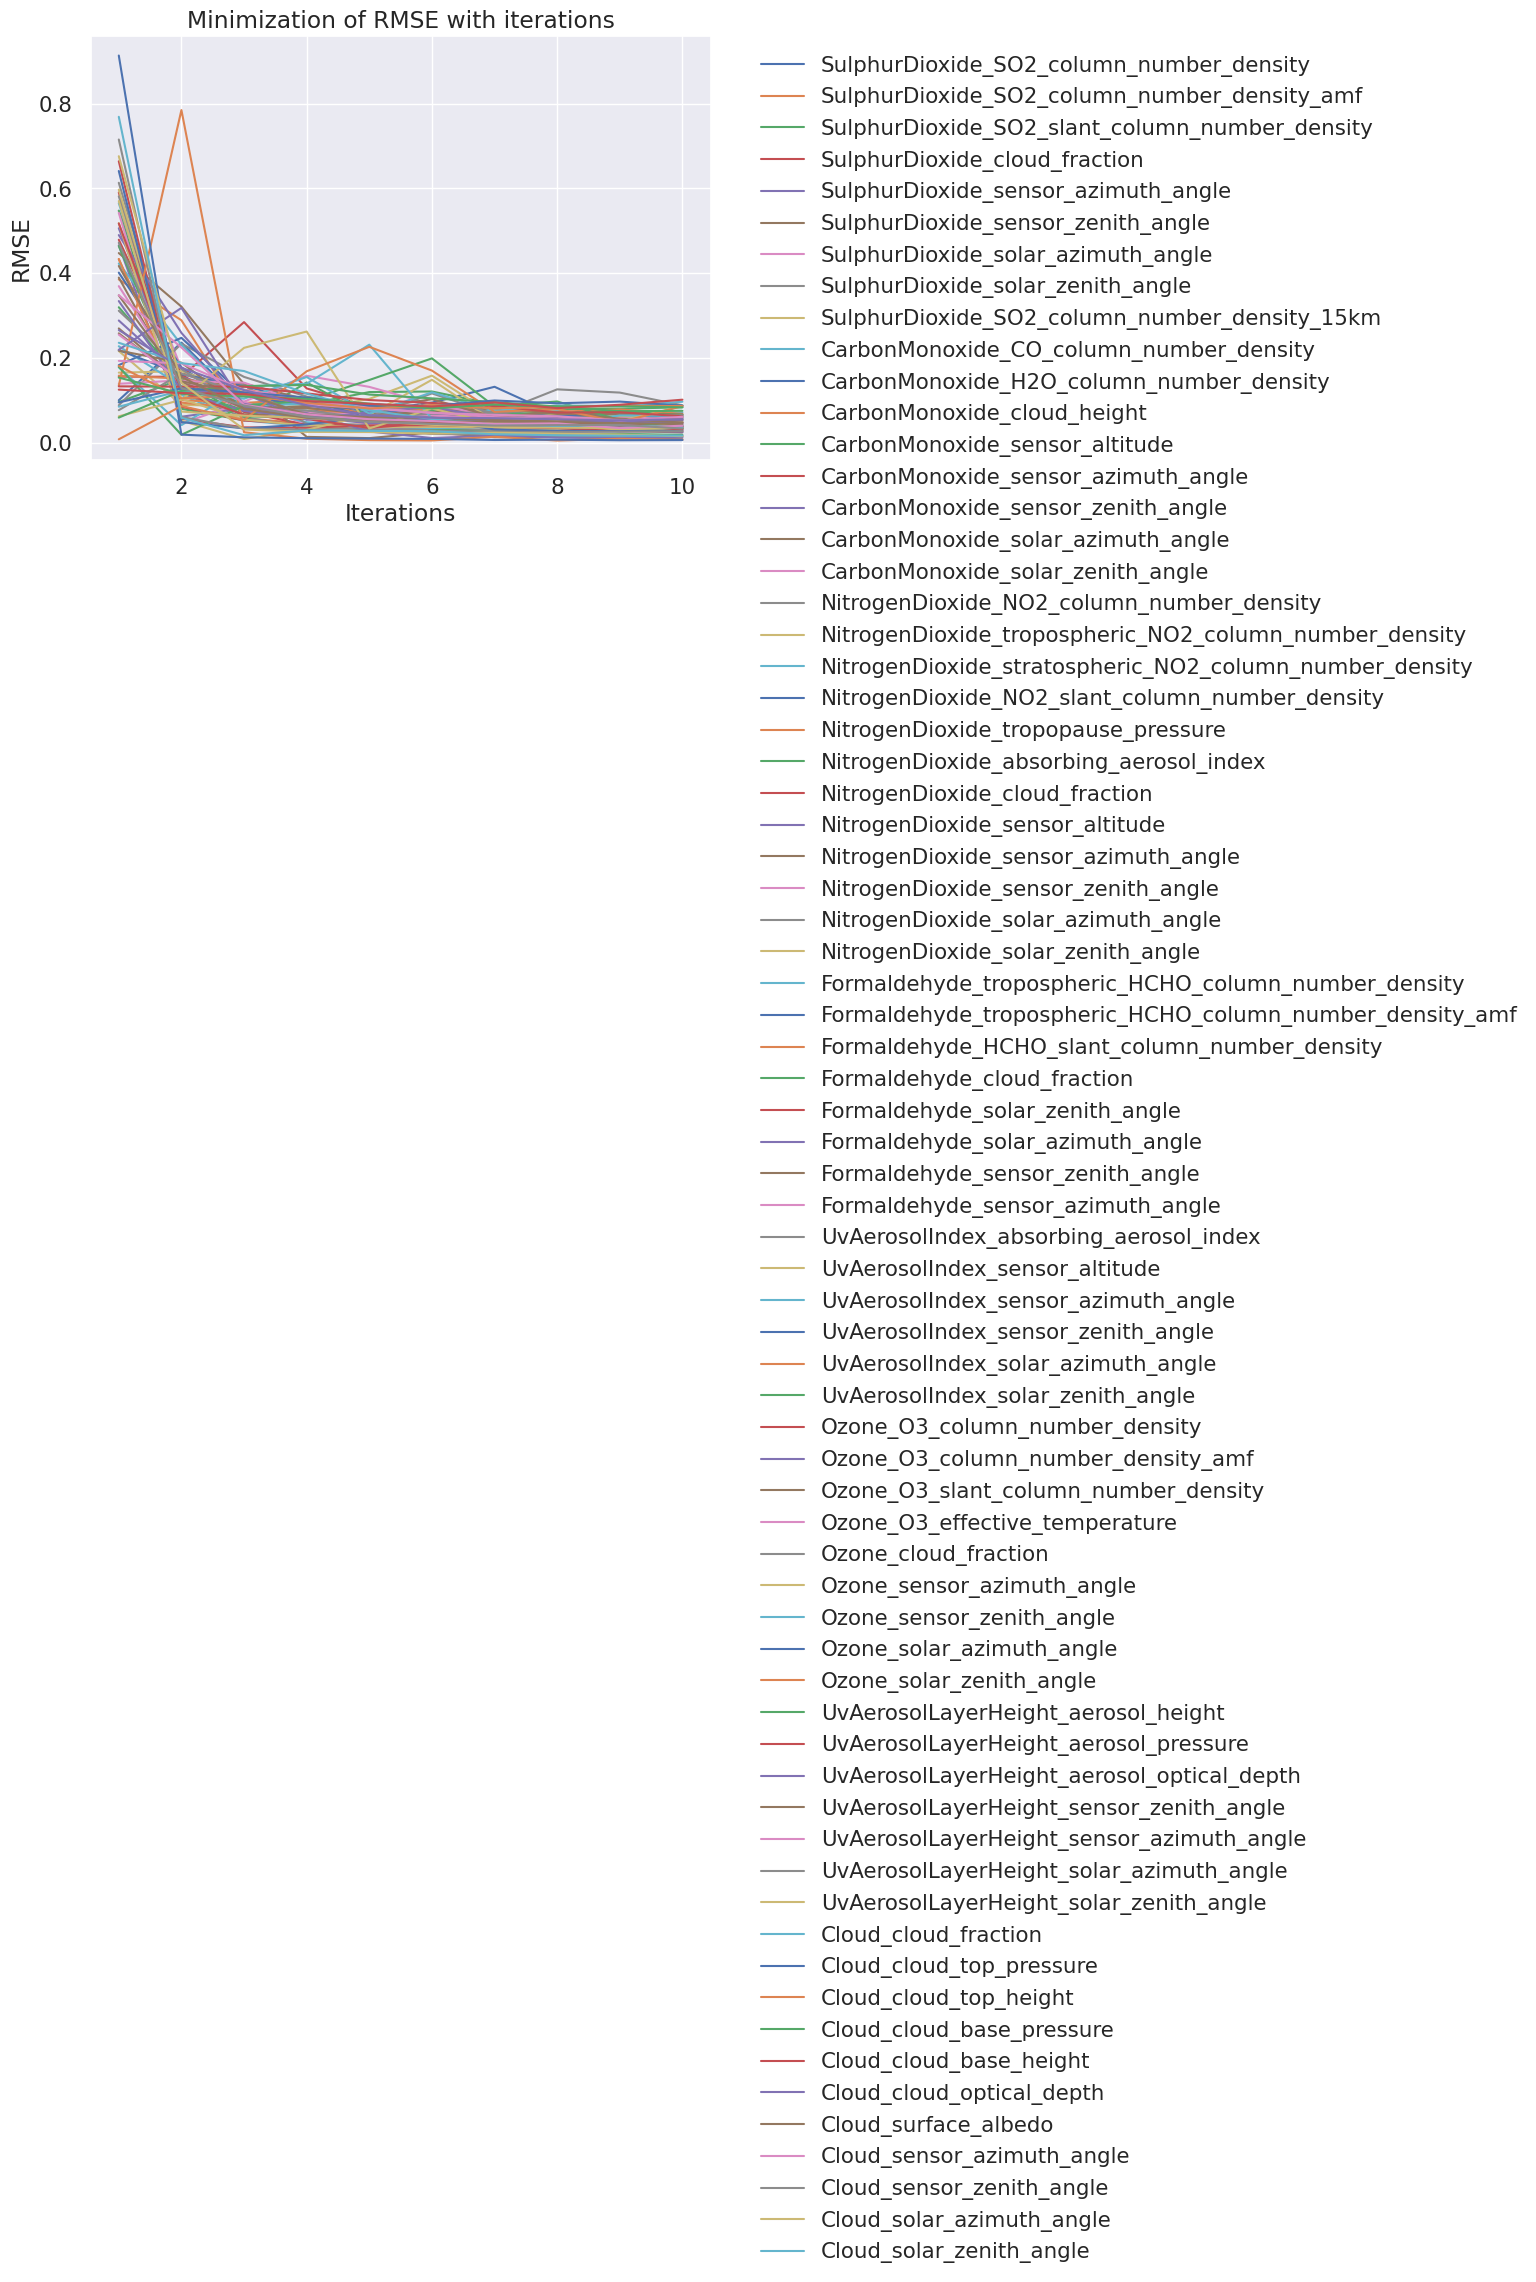

In [9]:
def get_id(row):
    return int(''.join(filter(str.isdigit, str(row['latitude']))) + ''.join(filter(str.isdigit, str(row['longitude']))))

train['id'] = train[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
test['id'] = test[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
new_ids = {id_: new_id for new_id, id_ in enumerate(train['id'].unique())}
train['id'] = train['id'].map(new_ids)
test['id'] = test['id'].map(new_ids)

def cluster_features(df, cluster_centers):
    for i, cc in enumerate(cluster_centers.values()):
        df[f'cluster_{i}'] = df.apply(lambda x: haversine((x['latitude'], x['longitude']), cc, unit='ft'), axis=1)
    return df

def coor_rotation(df):
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['longitude']) + \
                     (np.sin(np.radians(15)) * df['latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['latitude']) + \
                     (np.sin(np.radians(15)) * df['longitude'])

    df['rot_30_x'] = (np.cos(np.radians(30)) * df['longitude']) + \
                     (np.sin(np.radians(30)) * df['latitude'])

    df['rot_30_y'] = (np.cos(np.radians(30)) * df['latitude']) + \
                     (np.sin(np.radians(30)) * df['longitude'])
    return df

y = train['emission']

def preprocessing(df):
    
    good_col = 'Ozone_solar_azimuth_angle'
    df[good_col] = df.groupby(['id', 'year'])[good_col].ffill().bfill()
    df[f'{good_col}_lag_1'] = df.groupby(['id', 'year'])[good_col].shift(1).fillna(0)
    
    df = coor_rotation(df)
    return df

train = preprocessing(train)
test = preprocessing(test)

df = pd.concat([train, test], axis=0, ignore_index=True)
coordinates = df[['latitude', 'longitude']].values
clustering = KMeans(n_clusters=12, max_iter=1000, random_state=seed).fit(coordinates)
cluster_centers = {i: tuple(centroid) for i, centroid in enumerate(clustering.cluster_centers_)}
df = cluster_features(df, cluster_centers)

train = df.iloc[:-len(test),:]
test = df.iloc[-len(test):,:]
del df

train = train.drop('id', axis=1)
test = test.drop(['id','emission'], axis=1)

cont_missing=[f for f in train.columns if train[f].dtype!='O' and f not in ['emission']]
train,test = fill_missing_numerical(train,test,"emission",cont_missing,10)

In [10]:
cont_cols=[f for f in train.columns if train[f].dtype!="O" and f not in ['emission'] and train[f].nunique()/train[f].shape[0]*100>25]
len(cont_cols)

71

Use known transformations and select those that give the lowest rmse

In [11]:
sc=MinMaxScaler()
table = PrettyTable()
unimportant_features=[]
overall_best_score=99999999
overall_best_col='none'
table.field_names = ['Feature', 'Original RMSE', 'Transformation', 'Tranformed RMSE']

def min_max_scaler(train, test, column):
    
    sc=MinMaxScaler()
    
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    
    return train,test
for col in cont_cols:
     train, test=min_max_scaler(train, test, col)
for col in cont_cols:
    
    # Log Transformation after MinMax Scaling(keeps data between 0 and 1)
    train["log_"+col]=np.log1p(train[[col]])
    test["log_"+col]=np.log1p(test[[col]])
    
    # Square Root Transformation
    train["sqrt_"+col]=np.sqrt(train[[col]])
    test["sqrt_"+col]=np.sqrt(test[[col]])
    
    # Box-Cox transformation
    combined_data = pd.concat([train[[col]], test[[col]]], axis=0)
    transformer = PowerTransformer(method='box-cox')
    # Apply scaling and transformation on the combined data
    scaled_data = sc.fit_transform(combined_data)+1
    transformed_data = transformer.fit_transform(scaled_data)

    # Assign the transformed values back to train and test data
    train["bx_cx_" + col] = transformed_data[:train.shape[0]]
    test["bx_cx_" + col] = transformed_data[train.shape[0]:]
    
    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    train["y_J_"+col] = transformer.fit_transform(train[[col]])
    test["y_J_"+col] = transformer.transform(test[[col]])
    
    # Power transformation, 0.25
    power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
    transformer = FunctionTransformer(power_transform)
    train["pow_"+col] = transformer.fit_transform(train[[col]])
    test["pow_"+col] = transformer.transform(test[[col]])
    
    # Power transformation, 0.1
    power_transform = lambda x: np.power(x + 1 - np.min(x), 0.1)
    transformer = FunctionTransformer(power_transform)
    train["pow2_"+col] = transformer.fit_transform(train[[col]])
    test["pow2_"+col] = transformer.transform(test[[col]])
    
    # log to power transformation
    train["log_sqrt"+col]=np.log1p(train["sqrt_"+col])
    test["log_sqrt"+col]=np.log1p(test["sqrt_"+col])
    
    temp_cols=[col,"log_"+col,"sqrt_"+col, "bx_cx_"+col,"y_J_"+col ,"log_sqrt"+col, "pow_"+col,"pow2_"+col]
    
    # Fill na becaue, it would be Nan if the vaues are negative and a transformation applied on it
    train[temp_cols]=train[temp_cols].fillna(0)
    test[temp_cols]=test[temp_cols].fillna(0)

    #Apply PCA on  the features and compute an additional column
    pca=TruncatedSVD(n_components=1)
    x_pca_train=pca.fit_transform(train[temp_cols])
    x_pca_test=pca.transform(test[temp_cols])
    x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
    x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
    temp_cols.append(col+"_pca_comb")
    #print(temp_cols)
    test=test.reset_index(drop=True) # to combine with pca feature
    
    train=pd.concat([train,x_pca_train],axis='columns')
    test=pd.concat([test,x_pca_test],axis='columns')
    
    # See which transformation along with the original is giving you the best univariate fit with target
    kf=KFold(n_splits=5, shuffle=True, random_state=seed)
    
    MAE=[]
    
    for f in temp_cols:
        X=train[[f]].values
        y=train["emission"].values
        
        mae=[]
        for train_idx, val_idx in kf.split(X,y):
            X_train,y_train=X[train_idx],y[train_idx]
            x_val,y_val=X[val_idx],y[val_idx]
            
            model=LinearRegression()
            model.fit(X_train,y_train)
            y_pred=model.predict(x_val)
            mae.append(rmse(y_val,y_pred))
        MAE.append((f,np.mean(mae)))
        if overall_best_score>np.mean(mae):
            overall_best_score=np.mean(mae)
            overall_best_col=f
        if f==col:
            orig_mae=np.mean(mae)
    best_col, best_acc=sorted(MAE, key=lambda x:x[1], reverse=False)[0]
    
    cols_to_drop = [f for f in temp_cols if  f!= best_col and f not in col]
#     print(cols_to_drop)
    final_selection=[f for f in temp_cols if f not in cols_to_drop]
    if cols_to_drop:
        unimportant_features=unimportant_features+cols_to_drop
#         train=train.drop(columns=cols_to_drop)
#         test=test.drop(columns=cols_to_drop)

    table.add_row([col,orig_mae,best_col ,best_acc])
print(table)  
print("overall best CV RMSE score: ",overall_best_score)

+----------------------------------------------------------+--------------------+----------------------------------------------------------------+--------------------+
|                         Feature                          |   Original RMSE    |                         Transformation                         |  Tranformed RMSE   |
+----------------------------------------------------------+--------------------+----------------------------------------------------------------+--------------------+
|         SulphurDioxide_SO2_column_number_density         | 51072.553469329905 |          log_SulphurDioxide_SO2_column_number_density          |  51070.1427742901  |
|       SulphurDioxide_SO2_column_number_density_amf       |  51138.2585589166  |       bx_cx_SulphurDioxide_SO2_column_number_density_amf       | 51133.36275928376  |
|      SulphurDioxide_SO2_slant_column_number_density      | 51052.951805388126 |         SulphurDioxide_SO2_slant_column_number_density         | 51052.9518053

In [12]:
table = PrettyTable()
table.field_names = ['Cluster WOE Feature', 'MAE(CV-TRAIN)']
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
#     print(sub_set)
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=12)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))
    
#     cat_labels=cat_labels=train.groupby([col+"_unimp_cluster_WOE"])['emission'].mean()
#     cat_labels2=cat_labels.to_dict()
#     train[col+"_unimp_cluster_WOE"]=train[col+"_unimp_cluster_WOE"].map(cat_labels2)
#     test[col+"_unimp_cluster_WOE"]=test[col+"_unimp_cluster_WOE"].map(cat_labels2)
    
    kf=KFold(n_splits=5, shuffle=True, random_state=seed)
    
    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train["emission"].values

    best_rmse=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model=LinearRegression()
        model.fit(X_train,y_train)
        y_pred=model.predict(x_val)
        best_rmse.append(rmse(y_val,y_pred))
        
    table.add_row([col+"_unimp_cluster_WOE",np.mean(best_rmse)])
    if overall_best_score<np.mean(best_rmse):
            overall_best_score=np.mean(best_rmse)
            overall_best_col=col+"_unimp_cluster_WOE"
    
print(table)

+----------------------------------------------------------------------------+--------------------+
|                            Cluster WOE Feature                             |   MAE(CV-TRAIN)    |
+----------------------------------------------------------------------------+--------------------+
|         SulphurDioxide_SO2_column_number_density_unimp_cluster_WOE         | 51158.37755816804  |
|       SulphurDioxide_SO2_column_number_density_amf_unimp_cluster_WOE       | 51159.62261735844  |
|      SulphurDioxide_SO2_slant_column_number_density_unimp_cluster_WOE      | 51157.90456037929  |
|              SulphurDioxide_cloud_fraction_unimp_cluster_WOE               | 51159.39790980581  |
|           SulphurDioxide_sensor_azimuth_angle_unimp_cluster_WOE            | 51158.91267186713  |
|            SulphurDioxide_sensor_zenith_angle_unimp_cluster_WOE            | 51157.94194759461  |
|            SulphurDioxide_solar_azimuth_angle_unimp_cluster_WOE            | 51161.31540562259  |


Select better features

In [13]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=seed)  # Stratified k-fold object
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].iloc[train_index], train[target].iloc[val_index]
                model = LinearRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
                score = rmse(y_val, y_pred)
                scores.append(score)
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_acc = sorted(SCORES, key=lambda x: x[1])[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
#             print(corr_with_other_cols.abs().max())
            if (corr_with_other_cols.abs().max() < 0.9 or best_acc < best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with mean RMSE: {best_acc:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [14]:
exist_cols = [f for f in train.columns if f not in ['emission', 'ID_LAT_LON_YEAR_WEEK']]
top_features = {}

for f in exist_cols:
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    X = train[[f]].values
    y = np.log1p(train["emission"].values)

    best_rmse = []
    for train_idx, val_idx in kf.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        best_rmse.append(rmse(y_val, y_pred))

    avg_rmse = np.mean(best_rmse)
    top_features[f] = avg_rmse

# Sort the features based on log loss in ascending order
sorted_top_features = sorted(top_features.items(), key=lambda x: x[1])

# Get the top 100 features with the least log loss
top_50_features = [feature for feature, _ in sorted_top_features[:50]]
print("Top 50 features with the least RMSE:")
print(top_50_features)

Top 50 features with the least RMSE:
['cluster_6', 'longitude', 'bx_cx_NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density_pca_comb', 'y_J_NitrogenDioxide_tropospheric_NO2_column_number_density', 'bx_cx_NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_NO2_column_number_density_pca_comb', 'cluster_5', 'y_J_NitrogenDioxide_NO2_column_number_density', 'rot_15_x', 'log_sqrtNitrogenDioxide_NO2_column_number_density', 'log_sqrtNitrogenDioxide_tropospheric_NO2_column_number_density', 'cluster_2', 'sqrt_NitrogenDioxide_NO2_column_number_density', 'sqrt_NitrogenDioxide_tropospheric_NO2_column_number_density', 'log_NitrogenDioxide_NO2_column_number_density', 'pow2_NitrogenDioxide_NO2_column_number_density', 'log_NitrogenDioxide_tropospheric_NO2_column_number_density', 'pow_NitrogenDioxide_NO2_column_number_density', 'pow2_NitrogenDioxide_tropospheric_NO2_column_number_density', 'rot_30_x', 'pow_NitrogenDioxide_tropospheric_

In [15]:
train, test,new_cols=better_features(train, test, 'emission', top_50_features, overall_best_score)

Generating Columns:   2%|▏         | 1/50 [00:07<06:08,  7.53s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/cluster_6' with mean RMSE: 48865.6299 & Correlation 0.9391


Generating Columns:   4%|▍         | 2/50 [00:14<05:59,  7.48s/it]

Added column 'longitude*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49016.5702 & Correlation 0.9931


Generating Columns:   6%|▌         | 3/50 [00:22<05:49,  7.43s/it]

Added column 'bx_cx_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49053.2362 & Correlation 0.9975


Generating Columns:   8%|▊         | 4/50 [00:29<05:36,  7.32s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_tropospheric_NO2_column_number_density_pca_comb' with mean RMSE: 49135.0915 & Correlation 0.9804


Generating Columns:  10%|█         | 5/50 [00:36<05:24,  7.21s/it]

Added column 'y_J_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49054.4856 & Correlation 0.9968


Generating Columns:  12%|█▏        | 6/50 [00:43<05:12,  7.11s/it]

Added column 'bx_cx_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49015.4571 & Correlation 0.9987


Generating Columns:  14%|█▍        | 7/50 [00:50<05:00,  6.98s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_NO2_column_number_density_pca_comb' with mean RMSE: 49118.7395 & Correlation 0.9801


Generating Columns:  16%|█▌        | 8/50 [00:56<04:47,  6.84s/it]

Added column 'cluster_5*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49205.9055 & Correlation 0.9200


Generating Columns:  18%|█▊        | 9/50 [01:03<04:36,  6.75s/it]

Added column 'y_J_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49018.7137 & Correlation 0.9986


Generating Columns:  20%|██        | 10/50 [01:09<04:23,  6.59s/it]

Added column 'rot_15_x*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49012.2882 & Correlation 0.9880


Generating Columns:  22%|██▏       | 11/50 [01:15<04:12,  6.47s/it]

Added column 'log_sqrtNitrogenDioxide_NO2_column_number_density*sqrt_NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49047.0027 & Correlation 1.0000


Generating Columns:  24%|██▍       | 12/50 [01:21<04:00,  6.33s/it]

Added column 'log_sqrtNitrogenDioxide_tropospheric_NO2_column_number_density*sqrt_NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49066.7860 & Correlation 0.9975


Generating Columns:  26%|██▌       | 13/50 [01:27<03:48,  6.18s/it]

Added column 'cluster_2*NitrogenDioxide_tropospheric_NO2_column_number_density' with mean RMSE: 50045.8036 & Correlation 0.7643


Generating Columns:  28%|██▊       | 14/50 [01:33<03:38,  6.06s/it]

Added column 'sqrt_NitrogenDioxide_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49065.8096 & Correlation 0.9976


Generating Columns:  30%|███       | 15/50 [01:38<03:26,  5.89s/it]

Added column 'sqrt_NitrogenDioxide_tropospheric_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49087.6638 & Correlation 0.9963


Generating Columns:  32%|███▏      | 16/50 [01:44<03:15,  5.76s/it]

Added column 'log_NitrogenDioxide_NO2_column_number_density-pow_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49004.9716 & Correlation 0.9833


Generating Columns:  34%|███▍      | 17/50 [01:49<03:07,  5.67s/it]

Added column 'pow2_NitrogenDioxide_NO2_column_number_density*pow_NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49047.5128 & Correlation 1.0000


Generating Columns:  36%|███▌      | 18/50 [01:55<02:59,  5.61s/it]

Added column 'log_NitrogenDioxide_tropospheric_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49067.0260 & Correlation 0.9974


Generating Columns:  38%|███▊      | 19/50 [02:00<02:48,  5.43s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/pow_NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49047.5642 & Correlation 0.9998


Generating Columns:  40%|████      | 20/50 [02:05<02:38,  5.28s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/pow2_NitrogenDioxide_tropospheric_NO2_column_number_density' with mean RMSE: 49048.2079 & Correlation 0.9999


Generating Columns:  42%|████▏     | 21/50 [02:09<02:28,  5.13s/it]

Added column 'rot_30_x*NitrogenDioxide_NO2_column_number_density' with mean RMSE: 49051.5729 & Correlation 0.9651


Generating Columns:  44%|████▍     | 22/50 [02:14<02:19,  5.00s/it]

Added column 'NitrogenDioxide_NO2_column_number_density/pow_NitrogenDioxide_tropospheric_NO2_column_number_density' with mean RMSE: 49045.6809 & Correlation 0.9998


Generating Columns:  46%|████▌     | 23/50 [02:19<02:10,  4.84s/it]

Added column 'NitrogenDioxide_NO2_column_number_density-pow_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49008.3660 & Correlation 0.9887


Generating Columns:  48%|████▊     | 24/50 [02:23<02:02,  4.69s/it]

Added column 'NitrogenDioxide_tropospheric_NO2_column_number_density/pow_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49097.0480 & Correlation 0.9997


Generating Columns:  50%|█████     | 25/50 [02:27<01:54,  4.56s/it]

Added column 'log_sqrtNitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49645.4381 & Correlation 0.9929


Generating Columns:  52%|█████▏    | 26/50 [02:31<01:46,  4.43s/it]

Added column 'sqrt_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49666.3600 & Correlation 0.9863


Generating Columns:  54%|█████▍    | 27/50 [02:35<01:39,  4.31s/it]

Added column 'bx_cx_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49577.9137 & Correlation 0.9920


Generating Columns:  56%|█████▌    | 28/50 [02:39<01:31,  4.15s/it]

Added column 'y_J_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49581.1749 & Correlation 0.9926


Generating Columns:  58%|█████▊    | 29/50 [02:43<01:24,  4.04s/it]

Added column 'log_NitrogenDioxide_NO2_slant_column_number_density-pow2_UvAerosolLayerHeight_sensor_zenith_angle' with mean RMSE: 49588.9732 & Correlation 0.9673


Generating Columns:  60%|██████    | 30/50 [02:46<01:18,  3.91s/it]

Added column 'pow2_NitrogenDioxide_NO2_slant_column_number_density-NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49649.8256 & Correlation 1.0000


Generating Columns:  62%|██████▏   | 31/50 [02:50<01:11,  3.78s/it]

Added column 'NitrogenDioxide_NO2_slant_column_number_density/NitrogenDioxide_NO2_slant_column_number_density_pca_comb' with mean RMSE: 49610.8498 & Correlation 0.9976


Generating Columns:  64%|██████▍   | 32/50 [02:53<01:05,  3.62s/it]

Added column 'pow_NitrogenDioxide_NO2_slant_column_number_density-NitrogenDioxide_NO2_slant_column_number_density' with mean RMSE: 49649.7388 & Correlation 0.9999


Generating Columns:  66%|██████▌   | 33/50 [02:56<00:58,  3.46s/it]

Added column 'NitrogenDioxide_NO2_slant_column_number_density*cluster_3' with mean RMSE: 49570.4807 & Correlation 0.9503


Generating Columns:  68%|██████▊   | 34/50 [02:59<00:53,  3.32s/it]

Added column 'cluster_0/cluster_7' with mean RMSE: 50758.0657 & Correlation 0.4737


Generating Columns:  70%|███████   | 35/50 [03:02<00:47,  3.18s/it]

Added column 'cluster_3*cluster_7' with mean RMSE: 50577.4536 & Correlation 0.8472


Generating Columns:  72%|███████▏  | 36/50 [03:05<00:42,  3.05s/it]

Added column 'cluster_7/rot_30_y' with mean RMSE: 50381.7287 & Correlation 0.8484


Generating Columns:  74%|███████▍  | 37/50 [03:07<00:37,  2.90s/it]

Added column 'cluster_9+cluster_1' with mean RMSE: 51032.7064 & Correlation 0.9030


Generating Columns:  76%|███████▌  | 38/50 [03:10<00:33,  2.76s/it]

Added column 'cluster_4+cluster_1' with mean RMSE: 51025.3079 & Correlation 0.8563


Generating Columns:  78%|███████▊  | 39/50 [03:12<00:28,  2.64s/it]

Added column 'rot_30_y*cluster_1' with mean RMSE: 51008.7384 & Correlation 0.9788


Generating Columns:  80%|████████  | 40/50 [03:14<00:24,  2.48s/it]

Added column 'cluster_1*pow_UvAerosolLayerHeight_sensor_zenith_angle' with mean RMSE: 51029.2564 & Correlation 0.9987


Generating Columns:  82%|████████▏ | 41/50 [03:16<00:21,  2.34s/it]

Added column 'log_sqrtOzone_cloud_fraction-UvAerosolLayerHeight_sensor_zenith_angle_pca_comb' with mean RMSE: 51156.3601 & Correlation 0.9601


Generating Columns:  84%|████████▍ | 42/50 [03:18<00:17,  2.20s/it]

Added column 'bx_cx_Ozone_cloud_fraction/Ozone_cloud_fraction_pca_comb' with mean RMSE: 51156.8233 & Correlation 0.8512


Generating Columns:  86%|████████▌ | 43/50 [03:20<00:14,  2.09s/it]

Added column 'y_J_Ozone_cloud_fraction/Ozone_cloud_fraction_pca_comb' with mean RMSE: 51156.8267 & Correlation 0.8517


Generating Columns:  88%|████████▊ | 44/50 [03:22<00:11,  1.94s/it]

Added column 'sqrt_Ozone_cloud_fraction-UvAerosolLayerHeight_sensor_zenith_angle_pca_comb' with mean RMSE: 51156.6877 & Correlation 0.9211


Generating Columns:  90%|█████████ | 45/50 [03:23<00:08,  1.80s/it]

Added column 'log_UvAerosolLayerHeight_sensor_zenith_angle/Ozone_cloud_fraction_pca_comb' with mean RMSE: 51155.4412 & Correlation 0.8087


Generating Columns:  92%|█████████▏| 46/50 [03:24<00:06,  1.66s/it]

Added column 'UvAerosolLayerHeight_sensor_zenith_angle-UvAerosolLayerHeight_sensor_zenith_angle_pca_comb' with mean RMSE: 51156.1733 & Correlation 0.9989


Generating Columns:  94%|█████████▍| 47/50 [03:26<00:04,  1.52s/it]

Added column 'UvAerosolLayerHeight_sensor_zenith_angle_pca_comb/pow_UvAerosolLayerHeight_sensor_zenith_angle' with mean RMSE: 51156.2681 & Correlation 0.9996


Generating Columns:  96%|█████████▌| 48/50 [03:27<00:02,  1.38s/it]

Added column 'UvAerosolLayerHeight_sensor_zenith_angle_pca_comb/pow2_UvAerosolLayerHeight_sensor_zenith_angle' with mean RMSE: 51156.3304 & Correlation 0.9999


Generating Columns: 100%|██████████| 50/50 [03:28<00:00,  4.16s/it]

Added column 'log_UvAerosolLayerHeight_sensor_zenith_angle-UvAerosolLayerHeight_sensor_zenith_angle_pca_comb' with mean RMSE: 51156.3452 & Correlation 0.9999


In [16]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    for expression in expressions_list:
        # Split the expression based on operators (+, -, *, /)
        parts = expression.split('+') if '+' in expression else \
                expression.split('-') if '-' in expression else \
                expression.split('*') if '*' in expression else \
                expression.split('/')
        
        # Get the DataFrame column names involved in the operation
        cols = [col for col in parts]
        
        # Perform the corresponding arithmetic operation based on the operator in the expression
        if cols[0] in train.columns and cols[1] in train.columns:
            if '+' in expression:
                train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
            elif '-' in expression:
                train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
            elif '*' in expression:
                train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
            elif '/' in expression:
                train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)
    
    return train_df, test_df

train, test = apply_arithmetic_operations(train, test, new_cols)

In [17]:
new_cols

['NitrogenDioxide_NO2_column_number_density/cluster_6',
 'longitude*NitrogenDioxide_NO2_column_number_density',
 'bx_cx_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_tropospheric_NO2_column_number_density_pca_comb',
 'y_J_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
 'bx_cx_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_NO2_column_number_density_pca_comb',
 'cluster_5*NitrogenDioxide_NO2_column_number_density',
 'y_J_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
 'rot_15_x*NitrogenDioxide_NO2_column_number_density',
 'log_sqrtNitrogenDioxide_NO2_column_number_density*sqrt_NitrogenDioxide_NO2_column_number_density',
 'log_sqrtNitrogenDioxide_tropospheric_NO2_column_number_density*sqrt_N

In [18]:
# new_cols = ['NitrogenDioxide_NO2_column_number_density/cluster_6',
#  'longitude*NitrogenDioxide_NO2_column_number_density',
#  'bx_cx_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_tropospheric_NO2_column_number_density_pca_comb',
#  'y_J_NitrogenDioxide_tropospheric_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
#  'bx_cx_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
#  'cluster_5*NitrogenDioxide_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density/NitrogenDioxide_NO2_column_number_density_pca_comb',
#  'y_J_NitrogenDioxide_NO2_column_number_density*NitrogenDioxide_NO2_column_number_density',
#  'rot_15_x*NitrogenDioxide_NO2_column_number_density',
#  'log_sqrtNitrogenDioxide_NO2_column_number_density*sqrt_NitrogenDioxide_NO2_column_number_density',
#  'log_sqrtNitrogenDioxide_tropospheric_NO2_column_number_density*sqrt_NitrogenDioxide_NO2_column_number_density',
#  'cluster_2*NitrogenDioxide_tropospheric_NO2_column_number_density',
#  'sqrt_NitrogenDioxide_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density',
#  'sqrt_NitrogenDioxide_tropospheric_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density',
#  'log_NitrogenDioxide_NO2_column_number_density-pow_NitrogenDioxide_NO2_slant_column_number_density',
#  'pow2_NitrogenDioxide_NO2_column_number_density*pow_NitrogenDioxide_NO2_column_number_density',
#  'log_NitrogenDioxide_tropospheric_NO2_column_number_density+NitrogenDioxide_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density/pow_NitrogenDioxide_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density/pow2_NitrogenDioxide_tropospheric_NO2_column_number_density',
#  'rot_30_x*NitrogenDioxide_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density/pow_NitrogenDioxide_tropospheric_NO2_column_number_density',
#  'NitrogenDioxide_NO2_column_number_density-pow_NitrogenDioxide_NO2_slant_column_number_density',
#  'NitrogenDioxide_tropospheric_NO2_column_number_density/pow_NitrogenDioxide_NO2_slant_column_number_density',
#  'log_sqrtNitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density',
#  'sqrt_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density',
#  'bx_cx_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density',
#  'y_J_NitrogenDioxide_NO2_slant_column_number_density*log_NitrogenDioxide_NO2_slant_column_number_density',
#  'log_NitrogenDioxide_NO2_slant_column_number_density*cluster_3',
#  'pow2_NitrogenDioxide_NO2_slant_column_number_density-NitrogenDioxide_NO2_slant_column_number_density',
#  'NitrogenDioxide_NO2_slant_column_number_density/NitrogenDioxide_NO2_slant_column_number_density_pca_comb',
#  'pow_NitrogenDioxide_NO2_slant_column_number_density-NitrogenDioxide_NO2_slant_column_number_density',
#  'NitrogenDioxide_NO2_slant_column_number_density*cluster_3',
#  'cluster_0/cluster_7',
#  'cluster_3*cluster_7',
#  'cluster_7/rot_30_y',
#  'cluster_9+cluster_1',
#  'cluster_4+cluster_1',
#  'UvAerosolIndex_sensor_altitude_unimp_cluster_WOE+cluster_1',
#  'rot_30_y*cluster_1',
#  'cluster_1*log_sqrtSulphurDioxide_SO2_column_number_density_amf',
#  'NitrogenDioxide_sensor_altitude_unimp_cluster_WOE/log_sqrtSulphurDioxide_SO2_column_number_density_amf',
#  'log_sqrtOzone_cloud_fraction-bx_cx_SulphurDioxide_SO2_column_number_density_amf',
#  'bx_cx_Ozone_cloud_fraction-y_J_SulphurDioxide_SO2_column_number_density_amf',
#  'y_J_Ozone_cloud_fraction-y_J_SulphurDioxide_SO2_column_number_density_amf',
#  'sqrt_Ozone_cloud_fraction-bx_cx_SulphurDioxide_SO2_column_number_density_amf',
#  'bx_cx_SulphurDioxide_SO2_column_number_density_amf/Ozone_cloud_fraction_pca_comb',
#  'bx_cx_SulphurDioxide_SO2_column_number_density_amf-log_sqrtSulphurDioxide_SO2_column_number_density_amf',
#  'log_sqrtSulphurDioxide_SO2_column_number_density_amf-y_J_SulphurDioxide_SO2_column_number_density_amf']

# 6. Modelling

In [19]:
train=train.drop(columns=unimportant_features)
test=test.drop(columns=unimportant_features)

In [20]:
final_drop_list=[]

table = PrettyTable()
table.field_names = ['Original', 'Final Transformation', 'RMSE CV']
threshold=0.95
# It is possible that multiple parent features share same child features, so store selected features to avoid selecting the same feature again
best_cols=[]

for col in cont_cols:
    sub_set=[f for f in train.columns if col in f and train[f].nunique()>2]
#     print(sub_set)
    if len(sub_set)>2:
        correlated_features = []

        for i, feature in enumerate(sub_set):
            # Check correlation with all remaining features
            for j in range(i+1, len(sub_set)):
                correlation = np.abs(train[feature].corr(train[sub_set[j]]))
                # If correlation is greater than threshold, add to list of highly correlated features
                if correlation > threshold:
                    correlated_features.append(sub_set[j])

        # Remove duplicate features from the list
        correlated_features = list(set(correlated_features))
#         print(correlated_features)
        if len(correlated_features)>=2:

            temp_train=train[correlated_features]
            temp_test=test[correlated_features]
            #Scale before applying PCA
            sc=StandardScaler()
            temp_train=sc.fit_transform(temp_train)
            temp_test=sc.transform(temp_test)

            # Initiate PCA
            pca=TruncatedSVD(n_components=1)
            x_pca_train=pca.fit_transform(temp_train)
            x_pca_test=pca.transform(temp_test)
            x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
            x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
            train=pd.concat([train,x_pca_train],axis='columns')
            test=pd.concat([test,x_pca_test],axis='columns')

            # Clustering
            model = KMeans()
            kmeans = KMeans(n_clusters=12)
            kmeans.fit(np.array(temp_train))
            labels_train = kmeans.labels_

            train[col+'_final_cluster'] = labels_train
            test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))

#             cat_labels=cat_labels=train.groupby([col+"_final_cluster"])['emission'].mean()
#             cat_labels2=cat_labels.to_dict()
#             train[col+"_final_cluster"]=train[col+"_final_cluster"].map(cat_labels2)
#             test[col+"_final_cluster"]=test[col+"_final_cluster"].map(cat_labels2)

            correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]

            # See which transformation along with the original is giving you the best univariate fit with target
            kf=KFold(n_splits=5, shuffle=True, random_state=seed)

            scores=[]

            for f in correlated_features:
                X=train[[f]].values
                y=train["emission"].values

                mae=[]
                for train_idx, val_idx in kf.split(X,y):
                    X_train,y_train=X[train_idx],y[train_idx]
                    x_val,y_val=X[val_idx],y[val_idx]

                    model=LinearRegression()
                    model.fit(X_train, y_train)
                    y_pred = model.predict(x_val)
                    score = rmse(y_val, y_pred)
                    mae.append(score)
                if f not in best_cols:
                    scores.append((f,np.mean(mae)))
            best_col, best_acc=sorted(scores, key=lambda x:x[1], reverse=False)[0]
            best_cols.append(best_col)

            cols_to_drop = [f for f in correlated_features if  f not in best_cols]
            if cols_to_drop:
                final_drop_list=final_drop_list+cols_to_drop
            table.add_row([col,best_col ,best_acc])

print(table)

+--------------------------------------------------------+------------------------------------------------------------------------------------------------------+--------------------+
|                        Original                        |                                         Final Transformation                                         |      RMSE CV       |
+--------------------------------------------------------+------------------------------------------------------------------------------------------------------+--------------------+
|        SulphurDioxide_SO2_column_number_density        |                             log_SulphurDioxide_SO2_column_number_density                             |  51070.1427742901  |
|       NitrogenDioxide_NO2_column_number_density        |  log_NitrogenDioxide_NO2_column_number_density-pow_NitrogenDioxide_NO2_slant_column_number_density   | 49004.97159451525  |
| NitrogenDioxide_tropospheric_NO2_column_number_density | NitrogenDioxide_NO2_column

In [21]:
X_train = train.drop(['emission'], axis=1)
y_train = train['emission']

X_test = test.copy()

print(X_train.shape, X_test.shape)

(74005, 283) (28085, 283)


In [22]:
def get_most_important_features(X_train, y_train, n,model_input):
    # Initialize XGBoost Regressor with specified parameters
    
    lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'device': 'gpu',
            'random_state': seed
        }
    cb_params = {
            'iterations': 100,
            'depth': 6,
            'learning_rate': 0.02,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type':'GPU',
            'random_state': seed
        }
    if 'xgb' in model_input:
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            learning_rate=0.02,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=seed,
            device='gpu'
            )
    elif 'cat' in model_input:
        model=CatBoostRegressor(**cb_params)
    else:
        model=lgb.LGBMRegressor(**lgb_params)
    

    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    rmses = []

    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_val_fold)

        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
#         rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(y_pred)))

        rmses.append(rmse)

    avg_rmse = np.mean(rmses)

    feature_importances = model.feature_importances_

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(feature_importances)]

    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

    top_n_features = [feature[0] for feature in sorted_features[:n]]
    print(avg_rmse)
    return top_n_features

In [23]:
n_imp_features_cat=get_most_important_features(X_train, y_train,10, 'cat')
n_imp_features_xgb=get_most_important_features(X_train, y_train,30, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train, y_train,30, 'lgbm')

0:	learn: 52350.5729759	total: 15.9s	remaining: 26m 13s
1:	learn: 51347.3281598	total: 15.9s	remaining: 12m 59s
2:	learn: 50368.1253775	total: 15.9s	remaining: 8m 34s
3:	learn: 49407.5145858	total: 15.9s	remaining: 6m 21s
4:	learn: 48465.9712716	total: 15.9s	remaining: 5m 2s
5:	learn: 47546.3745815	total: 15.9s	remaining: 4m 9s
6:	learn: 46638.6828128	total: 15.9s	remaining: 3m 31s
7:	learn: 45752.0754826	total: 15.9s	remaining: 3m 3s
8:	learn: 44880.2966768	total: 16s	remaining: 2m 41s
9:	learn: 44021.5430474	total: 16s	remaining: 2m 23s
10:	learn: 43185.3971619	total: 16s	remaining: 2m 9s
11:	learn: 42366.1211990	total: 16s	remaining: 1m 57s
12:	learn: 41559.0689180	total: 16s	remaining: 1m 46s
13:	learn: 40767.2776528	total: 16s	remaining: 1m 38s
14:	learn: 39992.1870842	total: 16s	remaining: 1m 30s
15:	learn: 39229.8192975	total: 16s	remaining: 1m 24s
16:	learn: 38483.9202086	total: 16s	remaining: 1m 18s
17:	learn: 37754.5370623	total: 16s	remaining: 1m 13s
18:	learn: 37037.3780212

In [24]:
n_imp_features=[*set(n_imp_features_xgb+n_imp_features_lgbm+n_imp_features_cat)]
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

45 features have been selected from three algorithms for the final model


In [25]:
X_train=train[n_imp_features]
X_test=test[n_imp_features]

In [26]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

class Regressor:
    def __init__(self, n_estimators=100, device="gpu", random_state=seed):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.reg_models = self._define_reg_model()
        self.len_models = len(self.reg_models)
        
    def _define_reg_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.0116,
            'colsample_bytree': 1,
            'subsample': 0.6085,
            'min_child_weight': 9,
            'reg_lambda': 4.879e-07,
            'max_bin': 431,
            #'booster': 'dart',
            'n_jobs': -1,
            'eval_metric': 'rmse',
            'objective': "reg:squarederror",
            #'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        xgb_params1=xgb_params.copy()
        xgb_params1['subsample']=0.7
        xgb_params1['max_depth']=6
#         xgb_params1['learning_rate']=0.01
        xgb_params1['colsample_bytree']=0.6

        xgb_params2=xgb_params.copy()
        xgb_params2['subsample']=0.5
        xgb_params2['max_depth']=8
        xgb_params2['learning_rate']=0.047
        xgb_params2['colsample_bytree']=0.9
        xgb_params2['tree_method']='approx'

        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }
        lgb_params1=lgb_params.copy()
        lgb_params1['subsample']=0.9
        lgb_params1['reg_lambda']=0.8994221730208598
        lgb_params1['reg_alpha']=0.6236579699090548
        lgb_params1['max_depth']=6
        lgb_params1['learning_rate']=0.01
        lgb_params1['colsample_bytree']=0.5

        lgb_params2=lgb_params.copy()
        lgb_params2['subsample']=0.1
        lgb_params2['reg_lambda']=0.5940716788024517
        lgb_params2['reg_alpha']=0.4300477974434703
        lgb_params2['max_depth']=8
        lgb_params2['learning_rate']=0.019000000000000003
        lgb_params2['colsample_bytree']=0.8
        lgb_params3 = {
            'n_estimators': self.n_estimators,
            'num_leaves': 45,
            'max_depth': 5,
            'learning_rate': 0.0684383311038932,
            'subsample': 0.5758412171285148,
            'colsample_bytree': 0.8599714680300794,
            'reg_lambda': 1.597717830931487e-08,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
#             'verbosity': 0,
            'force_col_wise': True
        }
        lgb_params4=lgb_params.copy()
        lgb_params4['subsample']=0.3
        lgb_params4['reg_lambda']=0.5488355125638069
        lgb_params4['reg_alpha']=0.23414681424407247
        lgb_params4['max_depth']=7
        lgb_params4['learning_rate']=0.019000000000000003
        lgb_params4['colsample_bytree']=0.5

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate': 0.02,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
    
        cb_params1 = {
            'iterations': self.n_estimators,
            'depth': 8,
            'learning_rate': 0.01,
            'l2_leaf_reg': 0.1,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 50,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bernoulli',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb_params2= {
            'n_estimators': self.n_estimators,
            'depth': 10,
            'learning_rate': 0.08827842054729117,
            'l2_leaf_reg': 4.8351074756668864e-05,
            'random_strength': 0.21306687539993183,
            'max_bin': 483,
            'od_wait': 97,
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
            'silent': True
        }
        dt_params= {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 16, 'criterion': 'squared_error'}
        knn_params= {'weights': 'uniform', 'p': 1, 'n_neighbors': 12, 'leaf_size': 20, 'algorithm': 'kd_tree'}

        reg_models = {
            'xgb_reg': xgb.XGBRegressor(**xgb_params),
#             'xgb_reg1': xgb.XGBRegressor(**xgb_params1),
            'xgb_reg2': xgb.XGBRegressor(**xgb_params2),
            'lgb_reg': lgb.LGBMRegressor(**lgb_params),
#             'lgb2_reg': lgb.LGBMRegressor(**lgb_params1),
            'lgb3_reg': lgb.LGBMRegressor(**lgb_params2),
#             'lgb4_reg': lgb.LGBMRegressor(**lgb_params3),
            'lgb5_reg': lgb.LGBMRegressor(**lgb_params4),
            "hgbm": HistGradientBoostingRegressor(max_iter=self.n_estimators, learning_rate=0.01, loss="squared_error", 
                                                  n_iter_no_change=300,random_state=self.random_state),
            'cat_reg': CatBoostRegressor(**cb_params),
#             'cat_reg2': CatBoostRegressor(**cb_params1),
#             'cat_reg3': CatBoostRegressor(**cb_params2),
            "cat_sym": CatBoostRegressor(**cb_sym_params),
#             "cat_loss": CatBoostRegressor(**cb_loss_params),
            'etr': ExtraTreesRegressor(min_samples_split=12, min_samples_leaf= 6, max_depth=16,
                                       n_estimators=500,random_state=self.random_state),
#             'ann':ann,
            "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6,loss="squared_error", random_state=self.random_state),
#             "RandomForestRegressor": RandomForestRegressor(max_depth= 6,max_features= 'auto',min_samples_split= 4,
#                                                            min_samples_leaf= 4,  n_estimators=500, random_state=self.random_state, n_jobs=-1),
            'dt': DecisionTreeRegressor(**dt_params),
            
#             "lr":LinearRegression(),
#             "knn":KNeighborsRegressor(**knn_params),
#             "PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=3000, tol=1e-3, n_iter_no_change=30, random_state=self.random_state),
#             "HuberRegressor": HuberRegressor(max_iter=3000),

            
            
            
        }


        return reg_models

In [27]:
class OptunaWeights:
    def __init__(self, random_state=seed):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the RMSE score for the weighted prediction
        score = rmse(y_true, weighted_pred)
        return score

    def fit(self, y_true, y_preds, n_trials=1000):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.TPESampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=1000):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

Ensemble methods

In [28]:
# !pip install cma-es

kfold = True
n_splits = 1 if not kfold else 5
random_state = seed
random_state_list = [seed] 
n_estimators = 9999 
early_stopping_rounds = 600
verbose = False
device = 'gpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)


# Initialize an array for storing test predictions
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
trained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))
trained_models = {'lgb_reg':[]}

# Evaluate on validation data and store predictions on test data
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits

    # Get a set of Regressor models
    reg = Regressor(n_estimators, device, random_state)
    models = reg.reg_models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if name in ['cat_reg','cat_sym']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name == 'lgb_reg':
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])
        elif name=='hgbm':
            model.fit(X_train_, y_train_)
        elif name=='ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=2, epochs=60,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        if name=="ann":
            y_val_pred = model.predict(X_val)[:,0]
            test_pred = model.predict(X_test)[:,0]
        else:
            y_val_pred = model.predict(X_val)
            test_pred = model.predict(X_test)

        

#         # Convert predicted values back to their original scale by applying the expm1 function
#         y_val_pred = np.expm1(y_val_pred)
#         test_pred = np.expm1(test_pred)

        score = rmse(y_val, y_val_pred)
#         score = rmse(np.expm1(y_val), y_val_pred)

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] RMSE score: {score:.5f}')

        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
#     y_val_pred = optweights.fit_predict(np.expm1(y_val.values), oof_preds)

    score = rmse(y_val, y_val_pred)
#     score = rmse(np.expm1(y_val), y_val_pred)

    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] RMSE score -------> {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))

    gc.collect()

xgb_reg [FOLD-0 SEED-845] RMSE score: 1809.72978
xgb_reg2 [FOLD-0 SEED-845] RMSE score: 1781.45460
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 10527
[LightGBM] [Info] Number of data points in the train set: 59204, number of used features: 45
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 45 dense feature groups (2.71 MB) transferred to GPU in 0.003078 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 8093.167730
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
lgb_reg [FOLD-0 SEED-845] RMSE score: 2154.77236
[LightGBM] [Info] This is the GPU trainer!!
[L

In [29]:
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble RMSE score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name} {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble RMSE score 2331.02883 ± 505.99958
--- Model Weights ---
xgb_reg 0.06246 ± 0.07450
xgb_reg2 0.46848 ± 0.38219
lgb_reg 0.09672 ± 0.13028
lgb3_reg 0.12928 ± 0.19340
lgb5_reg 0.24820 ± 0.28850
hgbm 0.30750 ± 0.36328
cat_reg 0.22739 ± 0.30084
cat_sym 0.26167 ± 0.25618
etr 0.17655 ± 0.12140
GradientBoostingRegressor 0.40457 ± 0.32736
dt 0.62512 ± 0.39527


# 7. Fix values to correct error in submission

In [30]:
# Ensemble RMSE score 2331.02883 ± 505.99958

sub = pd.read_csv('/kaggle/input/sample/SampleSubmission.csv')
sub['emission'] = test_predss
sub["emission"] = sub["emission"].apply(lambda x: max(x, 0)) #ensure non negative predictions

sub['latitude'] = test['latitude']
sub['longitude'] = test['longitude']

sub['latitude'] = pd.to_numeric(sub['latitude'], errors='coerce')
sub['longitude'] = pd.to_numeric(sub['longitude'], errors='coerce')

sub['emission_avg'] = sub.groupby(['latitude','longitude'])['emission'].transform('mean')

# Scale up those locations with high emissions (top 50%) by 1.05
multiplier = 1.05
sub.loc[sub['emission_avg']>sub['emission_avg'].median(), 'emission'] = sub.loc[sub['emission_avg']>sub['emission_avg'].median(), 'emission']*multiplier

sub.loc[test_copy['longitude']==29.321, 'emission'] = train_copy.loc[(train_copy['year']==2021)&(train_copy['week_no']<=48)&(train_copy['longitude']==29.321),'emission'].values

In [31]:
sub = sub[['ID_LAT_LON_YEAR_WEEK','emission']]

In [32]:
sub.to_csv('final_submission.csv',index=False)
sub.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,256.552144
1,ID_-23.53_27.47_2019_2,233.817192
2,ID_-23.53_27.47_2019_3,231.272626
3,ID_-23.53_27.47_2019_4,264.570580
4,ID_-23.53_27.47_2019_5,304.249256
